In [1]:
from json import load
from pathlib import PurePath
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
import wordcloud as wordcloud
from wordcloud import STOPWORDS
from PIL import Image
import json

In [2]:
user_json_path = PurePath("../../data/user_json_files/")
user_raw_path = PurePath("../../data/clarkson2_files/")
user_list = [user for user in os.listdir(user_raw_path) if user != ".DS_Store"]

In [3]:
ocnt = "occurence_count"
tvec = "timing_vectors"

aggregator = {}
for i in range(len(user_list)):
    path_to_user = PurePath(user_json_path, PurePath(f"user_{user_list[i]}.json"))

    with open(path_to_user, "r") as f:
        user_dict = load(f)
        
    for word in user_dict:
        if word not in aggregator:
            aggregator[word] = user_dict[word][ocnt]

        else:
            aggregator[word] += user_dict[word][ocnt]

#print(aggregator)

    
    #user_dict.update(user_dict)

In [ ]:
word_occurences = [(key, aggregator[key]) for key in aggregator]
# word_occurences

In [10]:
sorted_word_occurences = sorted(tuple(filter(lambda x: len(x[0]) > 1, [(key, aggregator[key]) for key in aggregator])), key = lambda x: x[1], reverse=True)
word = [f"{sorted_word_occurences[i][0]} "*(sorted_word_occurences[i][1]) for i in range(len(sorted_word_occurences))]
concat = "".join(word)
text_write = open("wordcloud_data/txt_files/all_words.txt", "w")
text_to_file = text_write.write(concat)
text_write.close()
#concat

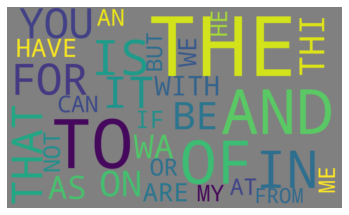

In [13]:
#word cloud with txt file 
text = open('wordcloud_data/txt_files/all_words.txt').read()
stop_words = ["xxxx", "xxx", "xx","xxxxx"]
wc = wordcloud.WordCloud(max_words= 30,collocations= False, background_color='grey', height = 600, width = 1000, stopwords= stop_words)
wc.generate(text)

# save to file
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show
wc.to_file('wordcloud_data/wordclouds/wordcloud_output.png')